<a href="https://colab.research.google.com/github/ranaurek/Quantum-Graph-Coloring/blob/main/QAOA_4_Coloring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install qiskit

In [ ]:
pip install pylatexenc

In [3]:
# As always, our preamble!

import numpy as np
import math as m
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_multivector

import qiskit
import networkx as nx
import matplotlib.pyplot as plt
from qiskit import *

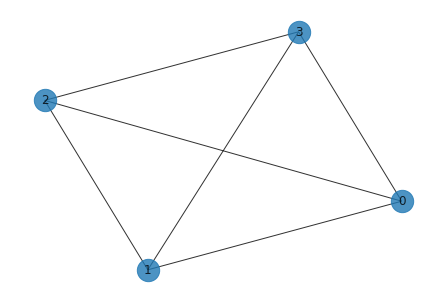

In [4]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3])
G.add_edges_from([(0, 1), (1, 2), (2,3), (3,0), (0,2), (1,3)])
nx.draw(G, with_labels=True, alpha=0.8, node_size=500)

In [5]:
from qiskit.circuit import Parameter

# Adjacency is essentially a matrix which tells you which nodes are
# connected. This matrix is given as a sparse matrix, so we need to
# convert it to a dense matrix
adjacency = nx.adjacency_matrix(G).todense()

nnodes = 4
ncolors = 2 #but actually 4 (we just need two qubits to store the 4 coloring information)
nqubits = nnodes * 2

beta = Parameter("$\\beta$")
qc_mix = QuantumCircuit(nqubits)
for i in range(0, nqubits):
    qc_mix.rx(beta, i)
    
qc_mix.draw()

┌─────────────┐
q_0: ┤ Rx($\beta$) ├
     ├─────────────┤
q_1: ┤ Rx($\beta$) ├
     ├─────────────┤
q_2: ┤ Rx($\beta$) ├
     ├─────────────┤
q_3: ┤ Rx($\beta$) ├
     ├─────────────┤
q_4: ┤ Rx($\beta$) ├
     ├─────────────┤
q_5: ┤ Rx($\beta$) ├
     ├─────────────┤
q_6: ┤ Rx($\beta$) ├
     ├─────────────┤
q_7: ┤ Rx($\beta$) ├
     └─────────────┘

In [6]:
gamma = Parameter("$\\gamma$")
qc_p = QuantumCircuit(nqubits)
for i in range(0,ncolors):
  for pair in list(G.edges()):  # pairs of nodes
    qc_p.rzz(gamma, pair[0]+nnodes*i, pair[1]+nnodes*i)
    qc_p.barrier()

qc_p.draw()

░                 ░                 ░                 ░ »
q_0: ─■──────────────░──■──────────────░──■──────────────░─────────────────░─»
      │ZZ($\gamma$)  ░  │              ░  │              ░                 ░ »
q_1: ─■──────────────░──┼──────────────░──┼──────────────░──■──────────────░─»
                     ░  │              ░  │ZZ($\gamma$)  ░  │ZZ($\gamma$)  ░ »
q_2: ────────────────░──┼──────────────░──■──────────────░──■──────────────░─»
                     ░  │ZZ($\gamma$)  ░                 ░                 ░ »
q_3: ────────────────░──■──────────────░─────────────────░─────────────────░─»
                     ░                 ░                 ░                 ░ »
q_4: ────────────────░─────────────────░─────────────────░─────────────────░─»
                     ░                 ░                 ░                 ░ »
q_5: ────────────────░─────────────────░─────────────────░─────────────────░─»
                     ░                 ░                 ░                 ░ »
q_6: ────────────────░─────────────────░─────────────────░─────────────────░─»
                     ░                 ░                 ░                 ░ »
q_7: ────────────────░─────────────────░─────────────────░─────────────────░─»
                     ░                 ░                 ░                 ░ »
«                     ░                 ░                 ░                 ░ »
«q_0: ────────────────░─────────────────░─────────────────░─────────────────░─»
«                     ░                 ░                 ░                 ░ »
«q_1: ─■──────────────░─────────────────░─────────────────░─────────────────░─»
«      │              ░                 ░                 ░                 ░ »
«q_2: ─┼──────────────░──■──────────────░─────────────────░─────────────────░─»
«      │ZZ($\gamma$)  ░  │ZZ($\gamma$)  ░                 ░                 ░ »
«q_3: ─■──────────────░──■──────────────░─────────────────░─────────────────░─»
«                     ░                 ░                 ░                 ░ »
«q_4: ────────────────░─────────────────░──■──────────────░──■──────────────░─»
«                     ░                 ░  │ZZ($\gamma$)  ░  │              ░ »
«q_5: ────────────────░─────────────────░──■──────────────░──┼──────────────░─»
«                     ░                 ░                 ░  │              ░ »
«q_6: ────────────────░─────────────────░─────────────────░──┼──────────────░─»
«                     ░                 ░                 ░  │ZZ($\gamma$)  ░ »
«q_7: ────────────────░─────────────────░─────────────────░──■──────────────░─»
«                     ░                 ░                 ░                 ░ »
«                     ░                 ░                 ░                 ░ 
«q_0: ────────────────░─────────────────░─────────────────░─────────────────░─
«                     ░                 ░                 ░                 ░ 
«q_1: ────────────────░─────────────────░─────────────────░─────────────────░─
«                     ░                 ░                 ░                 ░ 
«q_2: ────────────────░─────────────────░─────────────────░─────────────────░─
«                     ░                 ░                 ░                 ░ 
«q_3: ────────────────░─────────────────░─────────────────░─────────────────░─
«                     ░                 ░                 ░                 ░ 
«q_4: ─■──────────────░─────────────────░─────────────────░─────────────────░─
«      │              ░                 ░                 ░                 ░ 
«q_5: ─┼──────────────░──■──────────────░──■──────────────░─────────────────░─
«      │ZZ($\gamma$)  ░  │ZZ($\gamma$)  ░  │              ░                 ░ 
«q_6: ─■──────────────░──■──────────────░──┼──────────────░──■──────────────░─
«                     ░                 ░  │ZZ($\gamma$)  ░  │ZZ($\gamma$)  ░ 
«q_7: ────────────────░─────────────────░──■──────────────░──■──────────────░─
«                     ░                 ░             

In [7]:
qc_0 = QuantumCircuit(nqubits)
for i in range(0, nqubits):
    qc_0.h(i)
    
qc_0.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ H ├
     ├───┤
q_4: ┤ H ├
     ├───┤
q_5: ┤ H ├
     ├───┤
q_6: ┤ H ├
     ├───┤
q_7: ┤ H ├
     └───┘

In [8]:
qc_qaoa = QuantumCircuit(nqubits)

qc_qaoa.append(qc_0, [i for i in range(0, nqubits)])
qc_qaoa.append(qc_p, [i for i in range(0, nqubits)])
qc_qaoa.append(qc_mix, [i for i in range(0, nqubits)])

qc_qaoa.decompose().decompose().draw()

┌─────────┐                           ░                            ░      »
q_0: ┤ U2(0,π) ├──■────────────────────■───░───■────────────────────■───░───■──»
     ├─────────┤┌─┴─┐┌──────────────┐┌─┴─┐ ░   │                    │   ░   │  »
q_1: ┤ U2(0,π) ├┤ X ├┤ Rz($\gamma$) ├┤ X ├─░───┼────────────────────┼───░───┼──»
     ├─────────┤└───┘└──────────────┘└───┘ ░   │                    │   ░ ┌─┴─┐»
q_2: ┤ U2(0,π) ├───────────────────────────░───┼────────────────────┼───░─┤ X ├»
     ├─────────┤                           ░ ┌─┴─┐┌──────────────┐┌─┴─┐ ░ └───┘»
q_3: ┤ U2(0,π) ├───────────────────────────░─┤ X ├┤ Rz($\gamma$) ├┤ X ├─░──────»
     ├─────────┤                           ░ └───┘└──────────────┘└───┘ ░      »
q_4: ┤ U2(0,π) ├───────────────────────────░────────────────────────────░──────»
     ├─────────┤                           ░                            ░      »
q_5: ┤ U2(0,π) ├───────────────────────────░────────────────────────────░──────»
     ├─────────┤                           ░                            ░      »
q_6: ┤ U2(0,π) ├───────────────────────────░────────────────────────────░──────»
     ├─────────┤                           ░                            ░      »
q_7: ┤ U2(0,π) ├───────────────────────────░────────────────────────────░──────»
     └─────────┘                           ░                            ░      »
«                           ░                            ░      »
«q_0: ──────────────────■───░────────────────────────────░──────»
«                       │   ░                            ░      »
«q_1: ──────────────────┼───░───■────────────────────■───░───■──»
«     ┌──────────────┐┌─┴─┐ ░ ┌─┴─┐┌──────────────┐┌─┴─┐ ░   │  »
«q_2: ┤ Rz($\gamma$) ├┤ X ├─░─┤ X ├┤ Rz($\gamma$) ├┤ X ├─░───┼──»
«     └──────────────┘└───┘ ░ └───┘└──────────────┘└───┘ ░ ┌─┴─┐»
«q_3: ──────────────────────░────────────────────────────░─┤ X ├»
«                           ░                            ░ └───┘»
«q_4: ──────────────────────░────────────────────────────░──────»
«                           ░                            ░      »
«q_5: ──────────────────────░────────────────────────────░──────»
«                           ░                            ░      »
«q_6: ──────────────────────░────────────────────────────░──────»
«                           ░                            ░      »
«q_7: ──────────────────────░────────────────────────────░──────»
«                           ░                            ░      »
«                           ░                            ░      »
«q_0: ──────────────────────░────────────────────────────░──────»
«                           ░                            ░      »
«q_1: ──────────────────■───░────────────────────────────░──────»
«                       │   ░                            ░      »
«q_2: ──────────────────┼───░───■────────────────────■───░──────»
«     ┌──────────────┐┌─┴─┐ ░ ┌─┴─┐┌──────────────┐┌─┴─┐ ░      »
«q_3: ┤ Rz($\gamma$) ├┤ X ├─░─┤ X ├┤ Rz($\gamma$) ├┤ X ├─░──────»
«     └──────────────┘└───┘ ░ └───┘└──────────────┘└───┘ ░      »
«q_4: ──────────────────────░────────────────────────────░───■──»
«                           ░                            ░ ┌─┴─┐»
«q_5: ──────────────────────░────────────────────────────░─┤ X ├»
«                           ░                            ░ └───┘»
«q_6: ──────────────────────░────────────────────────────░──────»
«                           ░                            ░      »
«q_7: ──────────────────────░────────────────────────────░──────»
«                           ░                            ░      »
«                           ░                            ░      »
«q_0: ──────────────────────░────────────────────────────░──────»
«                           ░                            ░      »
«q_1: ──────────────────────░────────────────────────────░──────»
«                           ░                            ░      »
«q_2: ──────────────────────░─────────────────────────

In [ ]:
def maxcut_obj(x, G):
    """
    Given a bitstring as a solution, this function returns
    the number of edges shared between the two partitions
    of the graph.
    
    Args:
        x: str
           solution bitstring
           
        G: networkx graph
        
    Returns:
        obj: float
             Objective
    """
    obj = 0
    for k in range(0,ncolors):
      for i, j in G.edges():
          if x[i] != x[j]:
              obj -= 1
            
    return obj


def compute_expectation(counts, G):
    
    """
    Computes expectation value based on measurement results
    
    Args:
        counts: dict
                key as bitstring, val as count
           
        G: networkx graph
        
    Returns:
        avg: float
             expectation value
    """
    
    avg = 0
    sum_count = 0
    for bitstring, count in counts.items():
        
        obj = maxcut_obj(bitstring, G)
        avg += obj * count
        sum_count += count
        
    return avg/sum_count


# We will also bring the different circuit components that
# build the qaoa circuit under a single function
def create_qaoa_circ(G, theta):
    
    """
    Creates a parametrized qaoa circuit
    
    Args:  
        G: networkx graph
        theta: list
               unitary parameters
                     
    Returns:
        qc: qiskit circuit
    """
    
    #nqubits = len(G.nodes())
    p = len(theta)//2  # number of alternating unitaries
    qc = QuantumCircuit(nqubits)
    
    beta = theta[:p]
    gamma = theta[p:]
    
    # initial_state
    for i in range(0, nqubits):
        qc.h(i)
    
    for irep in range(0, p):
        
        # problem unitary
        for k in range(0,ncolors):
          for pair in list(G.edges()):
              qc.rzz(2 * gamma[irep], pair[0] + nnodes*k, pair[1] + nnodes*k)


        # wave-function ansatz
        for i in range(0, nqubits):
            qc.rx(2 * beta[irep], i)
            
    qc.measure_all()
        
    return qc

# Finally we write a function that executes the circuit on the chosen backend
def get_expectation(G, p, shots=512):
    
    """
    Runs parametrized circuit
    
    Args:
        G: networkx graph
        p: int,
           Number of repetitions of unitaries
    """
    
    backend = Aer.get_backend('qasm_simulator')
    backend.shots = shots
    
    def execute_circ(theta):
        
        qc = create_qaoa_circ(G, theta)
        counts = backend.run(qc, seed_simulator=10, 
                             nshots=1000).result().get_counts()
        
        return compute_expectation(counts, G)
    
    return execute_circ

In [ ]:
from scipy.optimize import minimize


expectation = get_expectation(G, p=1)

res = minimize(expectation, 
                      [1.0, 1.0, 1.0], 
                      method='COBYLA')
res

     fun: -7.384765625
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 41
  status: 1
 success: True
       x: array([ 0.27972825, -0.25412101,  0.94478321])

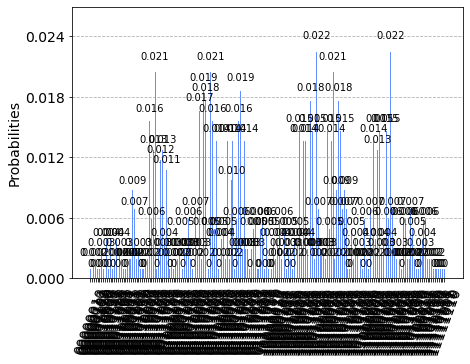

In [ ]:
from qiskit.visualization import plot_histogram

backend = Aer.get_backend('aer_simulator')
backend.shots = 1000

qc_res = create_qaoa_circ(G, res.x)

counts = backend.run(qc_res, seed_simulator=10).result().get_counts()

plot_histogram(counts)

In [ ]:
_=[print(k,v) for k,v in counts.items()]

01000010 1
01110111 1
11111001 1
00000010 1
00011011 1
11101111 1
11011001 2
11110101 1
00011101 2
00001010 1
01111110 1
00100001 1
10001111 1
00110111 1
10110100 2
01100000 4
00101111 1
11001000 4
01000111 1
00101001 7
01111100 5
00110011 16
00111000 3
00101110 1
01101001 16
00001100 3
00100110 9
00101100 3
01100110 14
01000110 5
10011000 3
10000100 2
00111101 3
11111010 1
01100011 14
00100010 2
10001001 3
00011000 2
10000101 4
11101010 2
11000100 4
01011011 5
11010110 6
10010001 5
11001001 15
01110110 6
10101101 7
11000011 14
10010111 3
01101011 3
10101100 9
10110111 2
00010010 1
11000110 15
00010110 4
01010111 5
10100010 2
10001011 1
00000101 2
10100100 5
01110101 5
10100000 3
10101010 15
00011100 3
10010010 4
10011110 3
11100110 6
01100010 2
10001110 2
10110010 1
01000100 2
01101010 19
11000101 13
00110110 21
10001010 5
10111001 1
10101001 18
01110011 3
10011001 18
10010110 14
10010101 14
01100101 10
11101100 2
10011101 7
00111001 12
10101011 7
11011111 1
01011010 16
10100110 21
10

In [ ]:
"""
explanation of what a single measurement means:
let's look at one of the high frequency measurements
10011100 23 
and
01010101 19

First is a valid coloring and the second isnt

seperate the string into this form:
1001
1100
for the 23 frequency measurement, we read from top to bottom
for example the first node is colored with 11, second node with 01,
third with 00 and forth with 10 they are all different colors so this 
is a valid coloring for our graph with all nodes being connected with each other

for the 19 frequency measurment we have the following:
0101
0101
this isnt a valid coloring since the first and third node are colored with 00,
and second and forth nodes are colored with 11
"""

In [ ]:
"""
all the high frequency results 

00110011 16 WRONG
01101001 16 WRONG
01100110 14 WRONG
01100011 14 TRUE
11001001 15 TRUE
11000011 14 WRONG
11000110 15 TRUE
10101010 15 WRONG
01101010 19 TRUE
11000101 13 TRUE
00110110 21 TRUE
10101001 18 TRUE
10011001 18 WRONG
10010110 14 WRONG
10010101 14 TRUE
01100101 10 TRUE
00111001 12 TRUE
01011010 16 WRONG
10100110 21 TRUE
11001010 15 TRUE
10011100 23 TRUE
01010011 17 TRUE
01010101 19 WRONG
01101100 14 TRUE
00111010 13 TRUE
01011001 21 TRUE
00111100 11 WRONG
10100011 15 TRUE
10011010 15 TRUE
10100101 14 WRONG
01011100 14 TRUE
11001100 23 WRONG
01010110 18 TRUE
10010011 15 TRUE
00110101 13 TRUE

weight of wrong 190
weight of true 365
success rate %66 and we can check these 44 results and verify them in polynomial time whether they're true or not
we've reduced the solution set from 256 to 44.

we've effectively reduced 

NOTE
with higher than 20 results:
success rate is 79%
"""